In [1]:
import pandas as pd
import numpy as np
import gc
from bce import *
from sklearn.preprocessing import StandardScaler

In [63]:
# df = pd.read_csv('./bihar_features_gee.csv')
# df0 = pd.read_csv('./interpolated_full.csv')
# df1 = df0[['Census 2011 ID', 
#            'Number of Households', 
#            'Number of Electrified Households', 
#            'Percentage Electrified']]
# df = df.merge(df1, left_on=['CEN_2011'], right_on=['Census 2011 ID'])
# del df0
# del df1
# del df['Census 2011 ID']
# del df['CEN_2011']
# gc.collect()
# df = df.fillna(-1)
# df.to_csv('./labeled.csv')
# del df

In [2]:
df_dict = data_clean('./bihar_features_gee.csv')

Begin data cleaning.
Read in data from ./bihar_features_gee.csv sucessfully.
All dataframes and labels generated.
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Deleting useless and predictive informative columns
Data cleaning successful.
NaN left: []
NaN left: []
NaN left: []


In [12]:
# pred_dict = voting_process(df_dict['df'], df_dict['label'], scale=True)

# plot_confusion_matrix(pred=pred_dict['prediction'][0], 
#                       truth=pred_dict['y_test'][0], 
#                       title='New DF confusion matrix', 
#                       save_path='./new_voting_cunf.png')

# plot_roc_curve(pred_dict=pred_dict, 
#                filter_list=['all', '100', '400'], 
#                save_path='./new_voting_roc.png')

# plot_precision_recall_curve(y_test=pred_dict['y_test'][0], 
#                             y_score=pred_dict['probaility'][0], 
#                             save_path='./new_voting_pr.png')

In [3]:
pred_dict = gdb_machine(df_dict['df'], df_dict['label'], penalty=20, scale=True)

plot_confusion_matrix(pred=pred_dict['prediction'][0], 
                      truth=pred_dict['y_test'][0], 
                      title='New DF confusion matrix', 
                      save_path='./new_gdb_cunf.png')

plot_roc_curve(pred_dict=pred_dict, 
               filter_list=['all', '100', '400'], 
               save_path='./new_gdb_roc.png')

plot_precision_recall_curve(y_test=pred_dict['y_test'][0], 
                            y_score=pred_dict['probaility'][0], 
                            save_path='./new_gdb_pr.png')

DF Scaling successful.
Plotting confusion matrix.
Saving to ./new_gdb_cunf.png
Plotting ROC/AUC plot.
Saving to ./new_gdb_roc.png
Plotting Precision-Recall Curve.
Saving to ./new_gdb_pr.png


In [4]:
sum(np.array(pred_dict['prediction'][0]) == np.array(pred_dict['y_test'][0]))/len(pred_dict['y_test'][0])

0.6664459891868035

In [6]:
pred_dict['prediction']

[array([ True, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False,  True,  True, ...,  True, False, False])]

In [7]:
count=0
for i, j in zip(pred_dict['prediction'][0],pred_dict['y_test'][0]):
    if i==j:
        count += 1
print(count/len(pred_dict['y_test'][0]))

0.6664459891868035


In [8]:
# for i in range(10, 51):
#     pred_dict = gdb_machine(df_dict['df'], df_dict['label'], penalty=i, scale=True)

#     plot_confusion_matrix(pred=pred_dict['prediction'][0], 
#                           truth=pred_dict['y_test'][0], 
#                           title='New DF confusion matrix')

In [9]:
df = df_dict['df'][0]

In [10]:
df = df.assign(outcome = df_dict['label'][0])

In [11]:
sum(np.array(df_dict['label'][0])==0)

2145

In [12]:
x, y = df_dict['df'][0], df_dict['label'][0]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
# x_train = x_train.assign(outcome = y_train)

In [14]:
df_sample = pd.concat([x_train[np.array(y_train)==1].sample(n=int(sum(np.array(y_train)==0)*1.5)),x_train[np.array(y_train)==0]]).sample(frac=1)

In [15]:
df_sample.shape

(4315, 368)

In [16]:
x_train, y_train = df_sample.drop(columns=['outcome']), df_sample.outcome

ValueError: labels ['outcome'] not contained in axis

In [63]:
gdb = GradientBoostingClassifier(n_estimators=7, 
                                         max_depth=6,
                                         min_samples_split=1780, 
                                         min_samples_leaf=1,
                                         random_state=20180320,
                                         subsample=0.8, 
                                         learning_rate=0.11)
gdb.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1780,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=20180320, subsample=0.8, verbose=0,
              warm_start=False)

In [64]:
predictions = gdb.predict(x_test)

In [65]:
sum(np.array(predictions) == np.array(y_test))/len(y_test)

0.9520026481297583

Plotting confusion matrix.
Dispalying the plot.


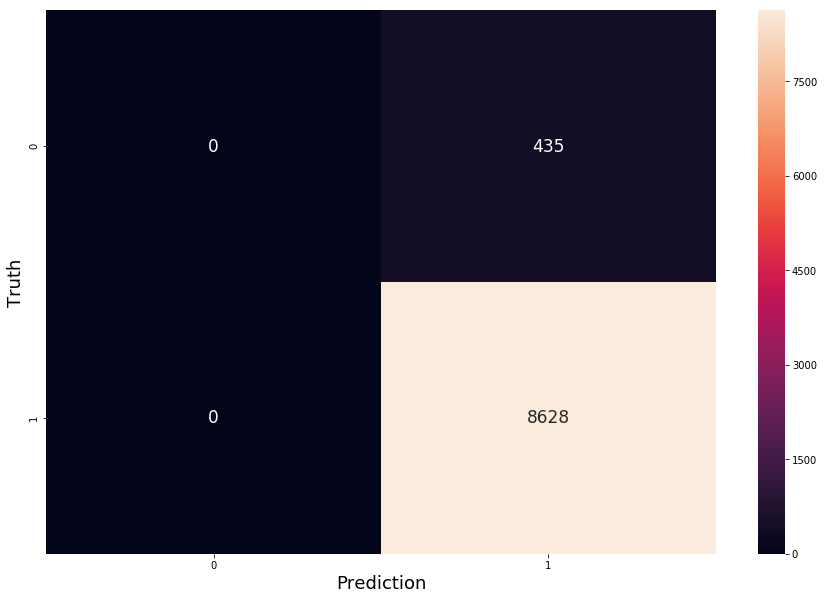

In [66]:
plot_confusion_matrix(predictions, y_test, title='')

In [23]:
pd_sampled = pd_sampled.sample(frac=1).reset_index(drop=True)

In [25]:
gdb = GradientBoostingClassifier(n_estimators=7, 
                                         max_depth=6,
                                         min_samples_split=1780, 
                                         min_samples_leaf=1,
                                         random_state=20180320,
                                         max_features=310, 
                                         subsample=0.8, 
                                         learning_rate=0.11)
gdb.fit(pd_sampled.drop(columns=['outcome']), pd_sampled['outcome'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=6,
              max_features=310, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1780,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=20180320, subsample=0.8, verbose=0,
              warm_start=False)

In [9]:
df_train = data_clean('./bihar_features_gee.csv')
df_test = pd.read_csv('./up_VIIRS_features.csv')
x_train, y_train = df_train['df'][0], df_train['label'][0]

Begin data cleaning.
Read in data from ./bihar_features_gee.csv sucessfully.
All dataframes and labels generated.
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Deleting useless and predictive informative columns
Data cleaning successful.
NaN left: []
NaN left: []
NaN left: []


In [10]:
scaler = StandardScaler()
features = [i for i in df_test.columns if i != 'label' and i in x_train.columns]
x_train = scaler.fit_transform(x_train[features])
x_test = scaler.fit_transform(df_test[features].fillna(-1))

In [11]:
gdb = GradientBoostingClassifier(n_estimators=7, 
                                         max_depth=6,
                                         min_samples_split=1780, 
                                         min_samples_leaf=1,
                                         random_state=20180320,
                                         subsample=0.8, 
                                         learning_rate=0.11)
        
weighting = lambda x:1 if x else 20
gdb.fit(x_train, y_train, sample_weight=[weighting(i) for i in y_train])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1780,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=20180320, subsample=0.8, verbose=0,
              warm_start=False)

In [67]:
predictions = gdb.predict(x_test)
df_test = df_test.assign(prediction=predictions)

In [30]:
df_test[['label', 'prediction']].to_csv('./prediction.csv')

In [68]:
df_test.shape

(2432, 110)

In [69]:
from sklearn.feature_selection import SelectFromModel

In [70]:
selection = SelectFromModel(gdb, prefit=True)

In [71]:
x_train_1 = selection.transform(x_train)

In [72]:
x_test_1 = selection.transform(x_test)

In [73]:
gdb.fit(x_train_1, y_train, sample_weight=[weighting(i) for i in y_train])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1780,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=20180320, subsample=0.8, verbose=0,
              warm_start=False)

In [74]:
predictions_1 = gdb.predict(x_test_1)

In [75]:
pred_0 = pd.read_csv('./prediction.csv')['prediction']

In [76]:
sum(predictions_1 != pred_0)

126

In [77]:
sum(predictions_1 != predictions)

243

In [80]:
feature_lst = []
for i in range(x_train_1.shape[1]):
    counter = 0
    for j in range(x_train.shape[1]):
        if sum(x_train_1[:,i] == x_train[:,j]) == x_train_1.shape[0]:
            print(counter)
            feature_lst.append(features[j])
            break
        counter += 1

1
13
24
35
37
43
51
53
55
56
57
58
59
61
62
63
64
68
69
73
77
80
83
85
86
88
92
95


In [81]:
feature_lst

['02VIIRS_10th',
 '02VIIRS_25th',
 '01VIIRS_75th',
 '12VIIRS_75th',
 '02VIIRS_90th',
 '08VIIRS_90th',
 '04VIIRS_MAX',
 '06VIIRS_MAX',
 '08VIIRS_MAX',
 '09VIIRS_MAX',
 '10VIIRS_MAX',
 '11VIIRS_MAX',
 '12VIIRS_MAX',
 '02VIIRS_MIN',
 '03VIIRS_MIN',
 '04VIIRS_MIN',
 '05VIIRS_MIN',
 '09VIIRS_MIN',
 '10VIIRS_MIN',
 '02VIIRS_MED',
 '06VIIRS_MED',
 '09VIIRS_MED',
 '12VIIRS_MED',
 '02VIIRS_STD_DEV',
 '03VIIRS_STD_DEV',
 '05VIIRS_STD_DEV',
 '09VIIRS_STD_DEV',
 '12VIIRS_STD_DEV']